<a href="https://colab.research.google.com/github/mortizg200/ejercicio-se-ales/blob/main/PARCIAL_2024_Manuel_Fernando_Ortiz_Giraldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ejercicio 2

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.spatial.distance import cdist

Graficamos la señal original

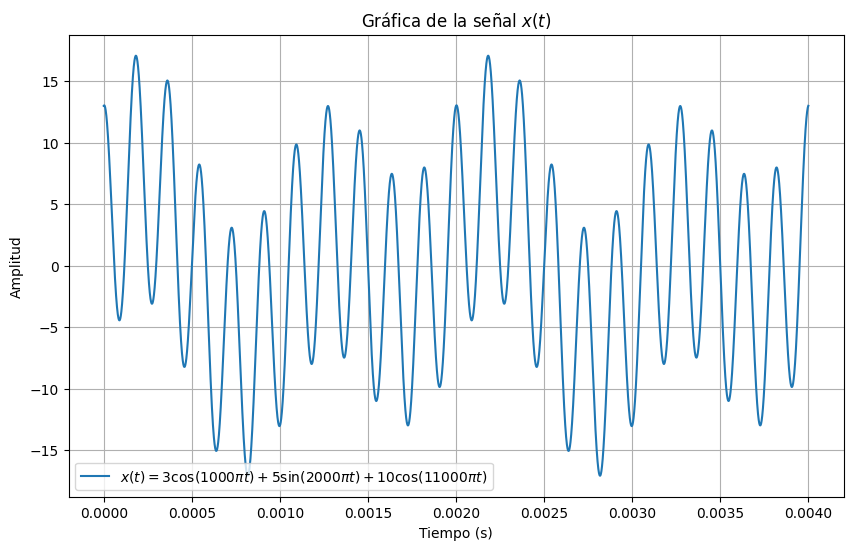

In [31]:
t = np.linspace(0, 0.004, 10000) # Definimos t y damos valor al intervalo de tiempo a graficar

# Definimos x_t como la señal a trabajar
x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Graficar la señal x(t)
plt.figure(figsize=(10, 6)) # Tamaño de la figura
plt.plot(t, x_t, label='$x(t) = 3\cos(1000\pi t) + 5\sin(2000\pi t) + 10\cos(11000\pi t)$') #Agregar leyendas y nombres al gráfico
plt.title('Gráfica de la señal $x(t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

muestreamos la señal y la graficamos

In [32]:
def muestrear_y_graficar(fs, duracion=0.006, titulo=''):
    """
    Muestra y grafica la señal x_t, utilizando la frecuencia de muestreo de 5kHz.

    Especificación de los parámetros:
    - fs: Frecuencia de muestreo en Hz.
    - duracion: Duración de la señal en segundos para la simulación.
    - titulo: Título para la gráfica de la señal.
    """

    T = 1/fs   # Periodo de muestreo
    t = np.arange(0, duracion, T)  # Vector de tiempo

    # Señal
    x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

    # Gráfica de la señal muestreada
    plt.figure(figsize=(10, 6))
    plt.stem(t, x_t, linefmt='b-', markerfmt="bo", basefmt="k")
    plt.title(titulo)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

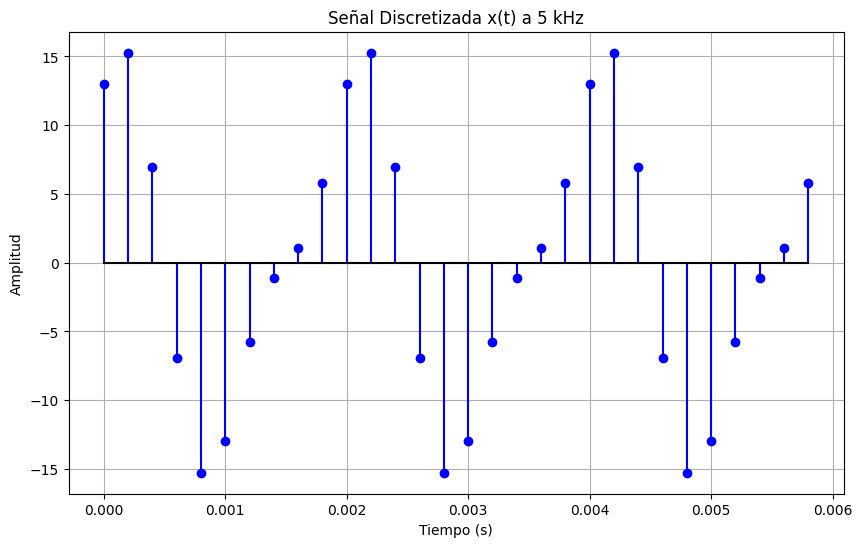

In [33]:
# Graficamos la señal muestreada a 5kHz

muestrear_y_graficar(5000, titulo='Señal Discretizada x(t) a 5 kHz')

la frecuencia de muestreo dada no es adecuada ya que es menor que el doble de la frecuensia maxima de la señal (5500 Hz), lo cual es necesario para evitar el aliasing según el teorema de Nyquist.

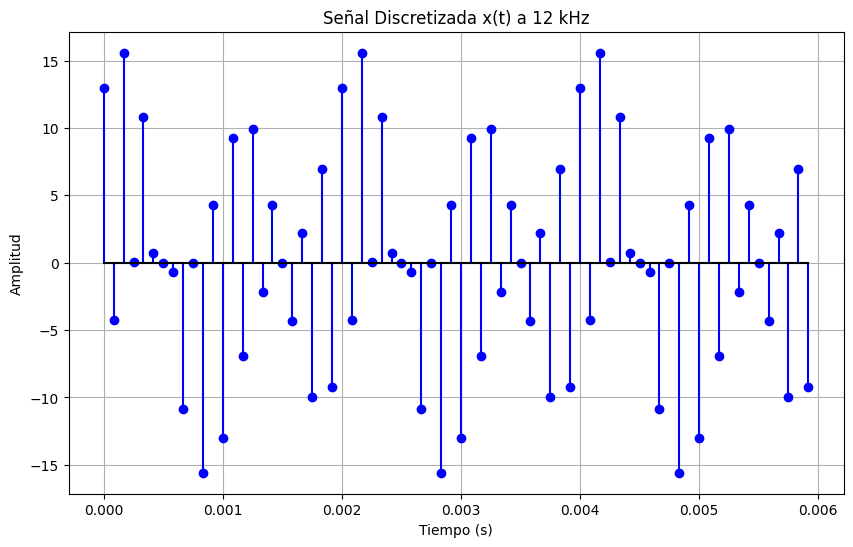

In [34]:
#Asignamos un nuevo valor para fs, en este caso utilizamos 12 kHz

muestrear_y_graficar(12000, titulo='Señal Discretizada x(t) a 12 kHz')

Ejercicio 3



In [35]:
#cero y pendiente
def my_ceropen(x,ymin = 0.004, ymax = 0.02):

  xmax = max(x)
  xmin = min(x)
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

Se implementan los codigos de discretización y cuantización

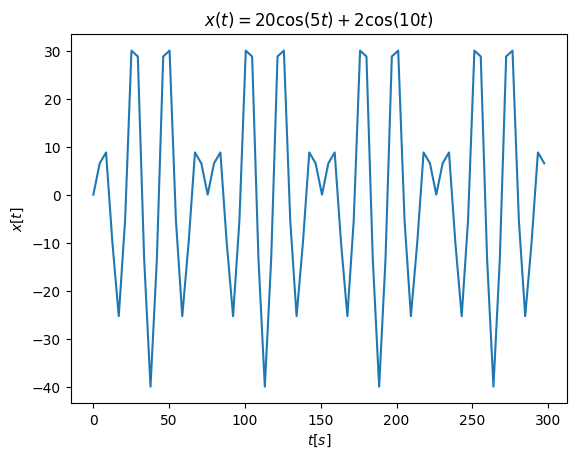

In [36]:
import numpy as np
import matplotlib.pyplot as plt
#Definir parámetros de la simulación se parametrisa la ecuacion dada pdf adjunto


T1 = 6*np.pi #Periodos de la señal 1
T2 = 8*np.pi #Periodos de la señal 2

#Periodo señal cuasiperiodica
T = 24*np.pi
#Frecuencias
F1 = 1/T1
F2 = 1/T2
#Fs: frecuencia muestreo
Fs = 6 * F2
Ts = 1/Fs #periodo muestreo

t = np.arange(0,4*T,Ts) #vector de tiempo que incluye  periodos cuasiperiódica
x = -20*np.cos(2*np.pi*F1*t) + 20*np.cos(2*np.pi*F2*t)

plt.plot(t,x)
plt.xlabel('$t[s]$')
plt.ylabel('$x[t]$')
plt.title('$x(t)=20 \cos(5 t) + 2\cos(10 t)$')
plt.show()

In [37]:
#llamdo a cero y pendiente
y =  my_ceropen(x,ymin = 0.004, ymax = 0.02)


In [38]:
from scipy.spatial.distance import cdist

def my_cuantizador(yn, vq) :
  Ne = vq.shape[0]
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))
  ind = np.argmin(dn)
  return vq[ind]

In [39]:
#número de bits y vector de cuantización
nbits = 4
rmin = 0.004
rmax = 0.02
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#recorrer vector cero y pendiente discretizado para cuantizar
for i in range(y.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(y[i],ve)) #apilar datos cuantizando si i>0

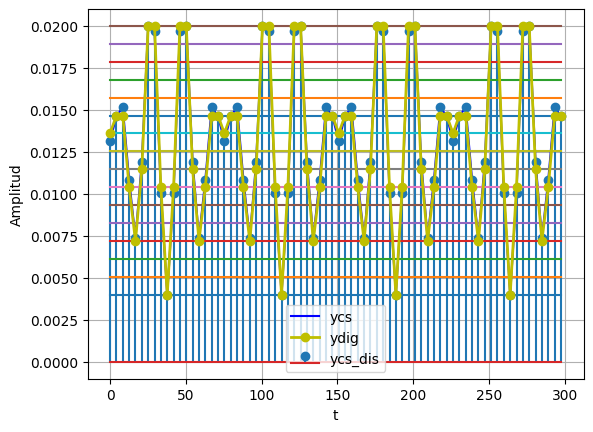

In [40]:
#graficar señales
plt.plot(t,y,c='b', label='ycs')#cs continua
plt.stem(t,y, label='ycs_dis')#cs discreta
#estados de cuantización
for v in ve:
  plt.plot(t,v*np.ones(len(t)))
# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

Teniendo la señal discretizada y cuantizada, se procede a encontrar la salida del SLIT aplicando la convolución entre la entrada digital y la respuesta impulso.

In [41]:
#crear señales

hu = np.array([2,4,1,5,0,10])
h = np.diff(hu).reshape(-1,1)

#funcion convolucion
def convgraf(h,ydig): #función general para pintar proceso de convolución de forma interactiva
   lydig = len(ydig)
   lh = len(h)
   M = 2*lydig+lh # se genera un vector de tamaño completo para visualizar todo el proceso paso a paso
   xm = np.zeros((M,M))
   hm = np.r_[np.zeros((lydig,1)),h,np.zeros((lydig,1))]
   ym = np.zeros((M,M))
   for i in range(M-lydig+1):
     #print(i)
     xm[i:i+lydig,i] = np.flip(x).reshape(-1)#filp realizar el proceso de reflejo sobre arreglos discretos
     ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto
   return xm, ym, hm

def plot_conv(k,xm,ym,hm): #dibujar arreglos
     plt.stem(xm[:,k],markerfmt='+',label='$x[k]$')
     plt.stem(hm,linefmt='g',markerfmt='.',label='$h[n-k]$')
     plt.stem(ym[:k,:].sum(axis=0),markerfmt='s',linefmt='r',label='$y[n]=\sum^{\infty}_{k=-\infty}x[k]h[n-k]$')
     plt.legend()
     plt.show()
     return

xm, ym, hm = convgraf(h,x)

<ipython-input-41-dcb85215baf8>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto


Se hace la grafica interactiva de la convolucion entre la entrada digital y la respuesta impulso.

In [42]:
#@interact(m=range(xm.shape[0]-len(x)+1)) #define panel tipo selección en el gráfico interactivo
from ipywidgets import interact
@interact(k=(0, xm.shape[0]-len(x), 1))
def show_frame(k=0):
    plot_conv(k,xm,ym,hm)
plt.show()

interactive(children=(IntSlider(value=0, description='k', max=77), Output()), _dom_classes=('widget-interact',…